# Sarcastic Reddit Post Generator



In [1]:
# For Google Colab to mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Provide path to the folder containing files
import os
os.chdir('/content/drive/My Drive/project')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Compiling**

In [4]:
# Importing Modules
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# p is set to a value between 0.0 and 1.0, so we can read in a percentage `p` sized portion of the data
p = 1.0

def read_in_data(file):
    return pd.read_csv(file, 
                       sep='\t', 
                       header=None, 
                       names=['label','comment','author','subreddit','score',
                              'ups','downs','date','created_utc','parent_comment'],
                       usecols=['label','comment','author','subreddit','score',
                              'date','created_utc','parent_comment'],  
                       skiprows=lambda i: i>0 and random.random() > p)

In [6]:
# Import training data from csv
data_train = read_in_data("data/train-balanced.csv.bz2")
data_train

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,2016-12,1483117213,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2009-04,1240620472,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,2009-05,1242340060,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,2009-01,1231633377,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,2009-01,1232745169,I've always been unsettled by that. I hear a l...


In [7]:
# Import training data from csv
data_test = read_in_data("data/test-balanced.csv.bz2")
data_test

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,Actually most of her supporters and sane peopl...,Quinnjester,politics,3,2016-09,1473569605,Hillary's Surrogotes Told to Blame Media for '...
1,0,They can't survive without an echo chamber whi...,TheGettysburgAddress,The_Donald,13,2016-11,1478788413,Thank God Liberals like to live in concentrate...
2,0,you're pretty cute yourself 1729 total,Sempiternally_free,2007scape,8,2016-11,1478042903,Saw this cutie training his Attack today...
3,0,If you kill me you'll crash the meme market,Catacomb82,AskReddit,2,2016-10,1477412597,If you were locked in a room with 49 other peo...
4,0,I bet he wrote that last message as he was sob...,Dorian-throwaway,niceguys,5,2016-11,1477962278,You're not even that pretty!
...,...,...,...,...,...,...,...,...
251603,1,Respect your elders you little snot.,Tiffany_Butler,sports,7,2009-06,1245445833,"Aren't you a little old to be on the internet,..."
251604,1,I'm just glad they won't be using taxpayer mon...,harryballsagna,canada,8,2009-06,1246140814,"""I'm sorry, I can't hear you over the sound of..."
251605,1,what.. with this awesome narration?,aberant,lost,4,2009-04,1240452084,"So far, so lame."
251606,1,He looks trustworthy.,permaculture,unitedkingdom,1,2009-01,1231343418,"""I don't care"" says Lapland boss"


In [8]:
# Compiling both dataframes
frames = [data_train, data_test]
data = pd.concat(frames)
df = data.copy()

In [9]:
df

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,2016-12,1483117213,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...
251603,1,Respect your elders you little snot.,Tiffany_Butler,sports,7,2009-06,1245445833,"Aren't you a little old to be on the internet,..."
251604,1,I'm just glad they won't be using taxpayer mon...,harryballsagna,canada,8,2009-06,1246140814,"""I'm sorry, I can't hear you over the sound of..."
251605,1,what.. with this awesome narration?,aberant,lost,4,2009-04,1240452084,"So far, so lame."
251606,1,He looks trustworthy.,permaculture,unitedkingdom,1,2009-01,1231343418,"""I don't care"" says Lapland boss"


In [10]:
# Saving the compiled dataframe to excel file
df.to_csv('data/dataset.csv', index=False)

## **Data Analysis**

In [11]:
# Reading the compiled csv file
df_ = pd.read_csv("data/dataset.csv") 
df = df_.dropna()
df.head()

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [ ]:
# Function to work plotly on Colab
# Have to run it in every cell plotly will be used
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Sarcastic vs Non-sarcastic Distribution

In [ ]:
import plotly as py
from plotly import graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

configure_plotly_browser_state()

# Make pie chart to compare the numbers of sarcastic and not-sarcastic headlines
labels = ['Sarcastic', 'Not Sarcastic']
count_sarcastic = len(df[df['label']==1])
count_notsar = len(df[df['label']==0])
values = [count_sarcastic, count_notsar]
# values = [20,50]

trace = go.Pie(labels=labels,
               values=values,
               textfont=dict(size=19, color='#FFFFFF'),
               marker=dict(
                   colors=['#DB0415', '#2424FF'] 
               )
              )

layout = go.Layout(title = '<b>Sarcastic vs Not Sarcastic</b>')
data = [trace]
fig = go.Figure(data=data, layout=layout)

iplot(fig)

*Well it seems that our data has balanced number on each category. Therefore, there'll be no need to check accuracy of the ML model for both labels.*

### Yearly Sarcasm Rate 

In [ ]:
df_yearly = df.copy()

df_yearly['date'] = pd.to_datetime(df_yearly['date'],yearfirst=True)
df['year'] = df_yearly['date'].apply(lambda d: d.year)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Getting Yearly Distribution
comments_by_year = df.groupby('year')['label'].agg([np.sum,np.mean])
comments_by_year

,sum,mean
year,,
2009,1348,0.585578
2010,3703,0.564310
2011,8722,0.548761
2012,18226,0.533064
2013,42836,0.537129
2014,91725,0.533592
2015,186261,0.520566
2016,278342,0.468619


Text(0.5, 1.0, 'Rate of Sarcasm on Reddit')

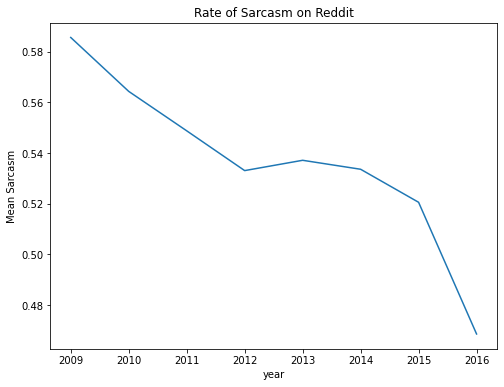

In [ ]:
# Plotting the Distribution
plt.figure(figsize=(8,6))
comments_by_year['mean'].plot(kind='line')
plt.ylabel('Mean Sarcasm')
plt.title('Rate of Sarcasm on Reddit')

### Overview of the Data

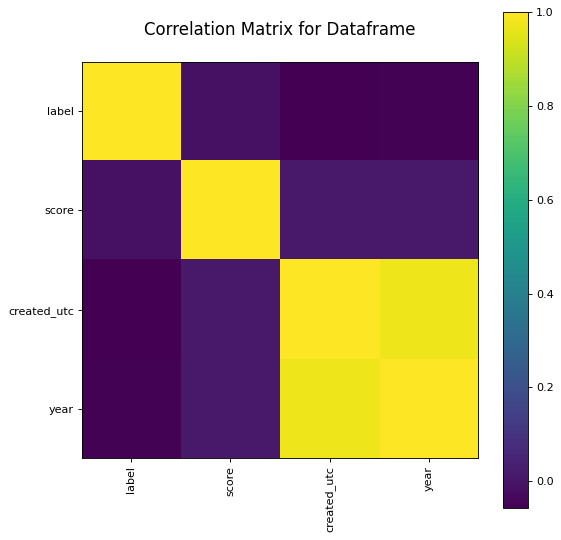

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Dataframe', fontsize=15)
    plt.show()

# Plot Correlation Matrix
plotCorrelationMatrix(df, 8)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Plot
plotScatterMatrix(df, 12, 10)

KeyboardInterrupt: ignored

### Authors Exploration

In [12]:
# Dropping irrelevant columns to save runtime
df_auth = df.drop(['subreddit', 'score', 'date', 'created_utc', 'parent_comment'], axis=1)
df_auth

,label,comment,author
0,0,NC and NH.,Trumpbart
1,0,You do know west teams play against west teams...,Shbshb906
2,0,"They were underdogs earlier today, but since G...",Creepeth
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha
4,0,I could use one of those tools.,cush2push
...,...,...,...
1262429,1,Respect your elders you little snot.,Tiffany_Butler
1262430,1,I'm just glad they won't be using taxpayer mon...,harryballsagna
1262431,1,what.. with this awesome narration?,aberant
1262432,1,He looks trustworthy.,permaculture


In [13]:
# Subsetting the dataframe for Sarcastic and Non-Sarcastic Comments
df_auth_sarc = df_auth.loc[df_auth['label'] == 1]
df_auth_nsarc = df_auth.loc[df_auth['label'] == 0]

In [ ]:
# Plotting Top 10 authors for sarcastic comments
plt.figure(figsize = (10,6))
chart = sns.countplot(x = 'author', data = df_auth_sarc, 
                      order = df_auth_sarc.author.value_counts().iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 authors having more number of Sarcastic comments')
plt.xlabel('Authors')
plt.ylabel('Number of Sarcastic Comments')

KeyboardInterrupt: ignored

<Figure size 720x432 with 0 Axes>

In [ ]:
# Plotting top 10 authors for non-sarcastic comments
plt.figure(figsize = (10,6))
chart = sns.countplot(x = 'author', data = df_auth_nsarc, 
                      order = df_auth_nsarc.author.value_counts().iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 authors having more number of Non-Sarcastic comments')
plt.xlabel('Authors')
plt.ylabel('Number of Non-Sarcastic Comments')

As we have same distribution of sarcastic and non-sarcastic comments. It's interesting fact even the authors are having same distribution over sarcastic and non-sarcastic comments

### Scores Exploration

In [ ]:
# Maximum and Minimum Score
print('Maximum Score :', df['score'].max())
print('----------')
print('Minimum Score :', df['score'].min())


Maximum Score : 9923
----------
Minimum Score : -507


In [ ]:
# Mean and STD of Score Rating

mean = df['score'].mean()
std = df['score'].std()
print('Mean Score :', mean)
print('----------')
print('Standard Deviation :', std)


Mean Score : 6.860435198321882
----------
Standard Deviation : 48.365664877557215


Text(0.5, 1.0, 'Scores for Sarcastic vs. None-Sarcastic Comments')

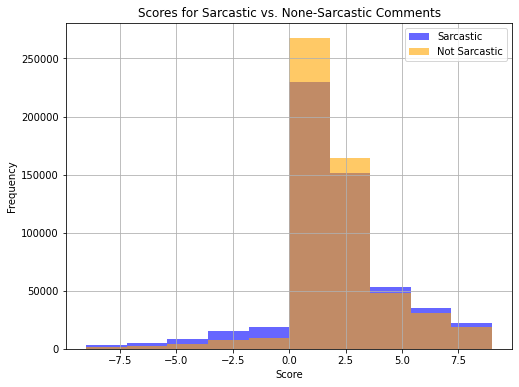

In [ ]:
# Distribution of Scores for Sarcastic and Non-Sarcastic Comments

plt.figure(figsize=(8,6))
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==1)]['score'].hist(alpha=0.6,label='Sarcastic', color = 'blue')
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==0)]['score'].hist(alpha=0.6,label='Not Sarcastic', color = 'orange')
plt.yscale('linear')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.legend()
plt.title('Scores for Sarcastic vs. None-Sarcastic Comments')

Text(0.5, 1.0, 'LogBase10-Scores for Sarcastic vs. None-Sarcastic Comments')

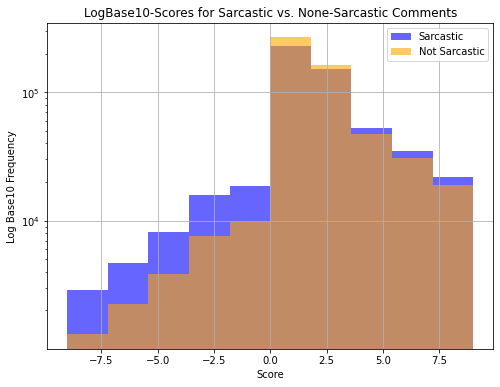

In [ ]:
# Distribution of LogBase10 Scores for Sarcastic and Non-Sarcastic Comments 

plt.figure(figsize=(8,6))
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==1)]['score'].hist(alpha=0.6,label='Sarcastic', color = 'blue')
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==0)]['score'].hist(alpha=0.6,label='Not Sarcastic', color = 'orange')
plt.yscale('log')
plt.ylabel('Log Base10 Frequency')
plt.xlabel('Score')
plt.legend()
plt.title('LogBase10-Scores for Sarcastic vs. None-Sarcastic Comments')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Natural Log Length of Comments')

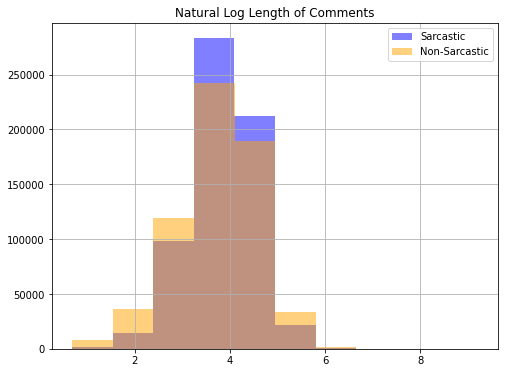

In [ ]:
# Natural Log Length of Comments for Sarcastic and Non-Sarcastic Comments

plt.figure(figsize=(8,6))
df['log_comment'] = df['comment'].apply(lambda text: np.log1p(len(text)))
df[df['label']==1]['log_comment'].hist(alpha=0.5,label='Sarcastic', color = 'blue')
df[df['label']==0]['log_comment'].hist(alpha=0.5,label='Non-Sarcastic', color = 'orange')
plt.legend()
plt.title('Natural Log Length of Comments')

### Words Cloud

In [ ]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 

import re 
import string
import nltk # preprocessing text
nltk.download('stopwords')
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))

In [ ]:
# function for pre-processing the text of reviews: this function remove punctuation, stopwords and returns the list of words
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)

In [ ]:
df_WC_sarc = pd.DataFrame()

# Subsetting the dataframe for Sarcastic and Non-Sarcastic Comments
df_WC_sarc = df.loc[df['label'] == 1]
df_WC_nsarc = df.loc[df['label'] == 0]

# Preprocess the words
df_WC_sarc['text_processed'] = df_WC_sarc['comment'].apply(preprocess)
df_WC_nsarc['text_processed'] = df_WC_nsarc['comment'].apply(preprocess)

KeyboardInterrupt: ignored

In [ ]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(df_WC_sarc['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Words in Sarcastic Comments", fontsize=40,color='Green')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [ ]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(df_WC_nsarc['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Words in Non-Sarcastic Comments", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

### Categories Exploration

In [ ]:
# Dropping irrelevant columns to save runtime
df_cat = df.drop(['author', 'score', 'date', 'created_utc', 'parent_comment'], axis=1)
df_cat

In [ ]:
# Plotting Top 10 authors for sarcastic comments
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,6))
chart = sns.countplot(y = 'subreddit', data = df_cat, 
                      order = df_cat.subreddit.value_counts().iloc[:10].index, saturation = 1, linewidth = 2, edgecolor = (0, 0, 0))
#chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 subreddits having more number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Subreddits')

In [ ]:
help(sns.set)

###Training


In [14]:
df_auth_sarc

,label,comment,author
33,1,But they'll have all those reviews!,RoguishPoppet
44,1,wow it is totally unreasonable to assume that ...,pb2crazy
45,1,Ho ho ho... But Melania said that there is no ...,pb2crazy
66,1,I can't wait until @potus starts a twitter war...,kitduncan
69,1,gotta love the teachers who give exams on the ...,DEP61
...,...,...,...
1262429,1,Respect your elders you little snot.,Tiffany_Butler
1262430,1,I'm just glad they won't be using taxpayer mon...,harryballsagna
1262431,1,what.. with this awesome narration?,aberant
1262432,1,He looks trustworthy.,permaculture


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [16]:
sarc_df = pd.DataFrame(df_auth_sarc['comment'])
sarc_df

,comment
33,But they'll have all those reviews!
44,wow it is totally unreasonable to assume that ...
45,Ho ho ho... But Melania said that there is no ...
66,I can't wait until @potus starts a twitter war...
69,gotta love the teachers who give exams on the ...
...,...
1262429,Respect your elders you little snot.
1262430,I'm just glad they won't be using taxpayer mon...
1262431,what.. with this awesome narration?
1262432,He looks trustworthy.


In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sarc_df['comment'])

total_words = len(tokenizer.word_index) + 1
print(total_words)

input_sequences = []

for line in sarc_df['comment']:
  token_list = [] 
  try:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
  except:
    pass

124619


In [21]:
max_sequence_length = max([len(x) for x in input_sequences])
print(max_sequence_length)

344


In [ ]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = Sequential()
model.add(Embedding(total_words, 80, input_length=max_sequence_length-1))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(50))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(total_words/20))
model.add(Dense(total_words, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 343, 80)           9969520   
_________________________________________________________________
lstm (LSTM)                  (None, 343, 100)          72400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 6230)              317730    
_________________________________________________________________
dense_1 (Dense)              (None, 124619)            776500989 
Total params: 786,890,839
Trainable params: 786,890,839
Non-trainable params: 0
__________________________________________

In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(xs, ys, epochs=200, verbose=1)

NameError: ignored